In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)


## Analisis del evento "lead"

Veremos como se comporta los usuarios que accedieron a este evento de la pagina.

In [111]:
lead = (df.loc[df['event'] == 'lead'])['person']
df_lead_users = df.loc[df.person.isin(lead)]
df_lead_users.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,63887,63887,63887,3881,34000,34448,34000,34000,34000,17265,3060,410,3882,2283,5529,5529,5529,5529,5529,5529,5529,5529,5529
unique,56926,11,291,148,1947,181,5,8,61,6736,733,12,19,3,6,2,278,27,5,3,47,35,81
top,2018-03-21 01:11:52,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"3371,6357,6371,2777,3191,6791,2718,2725,6399,3...",J7,CustomerService,google,Google,Direct,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,6,32907,2771,1362,259,2558,14599,12286,8984,62,109,226,2258,2221,1830,5243,1006,1152,5376,2813,1949,1329,1032


Vemos que solo 291 personas lo utilizaron

In [112]:
event_counts_lead = df_lead_users.event.value_counts()
checkout_vs_conversion = event_counts_lead.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing'])
event_counts_lead

viewed product       32907
brand listing         9439
visited site          5529
generic listing       4381
ad campaign hit       3887
searched products     3510
search engine hit     2283
checkout               969
lead                   448
staticpage             410
conversion             124
Name: event, dtype: int64

Tambien vemos que de esas 291 personas se realizaron 124 conversion lo que es un muy buen valor dada la proporcion

In [113]:
conversion_person_lead =(df_lead_users.loc[df_lead_users['event'] == 'conversion'])['person'].drop_duplicates()
df_lead_users_conversion = df_lead_users.loc[df_lead_users['person'].isin(conversion_person_lead)]
event_counts_lead_conversion= df_lead_users_conversion.event.value_counts()
event_counts_lead= df_lead_users.event.value_counts()
checkout_vs_conversion_lead = event_counts_lead_conversion.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing'])
event_counts_lead


viewed product       32907
brand listing         9439
visited site          5529
generic listing       4381
ad campaign hit       3887
searched products     3510
search engine hit     2283
checkout               969
lead                   448
staticpage             410
conversion             124
Name: event, dtype: int64

In [114]:
conversion_person_lead.describe()

count           58
unique          58
top       971246dd
freq             1
Name: person, dtype: object

De las 291 personas 58 decidieron comprar, y al tener 124 compras vemos que muchos compraron mas de una vez!


In [115]:
data_from_lead = pd.DataFrame({"Personas que usaron el evento lead":[291], "Personas que pidieron stock y compraron":[58], "Compras realizadas totales":[124]})
data_from_lead

,Personas que usaron el evento lead,Personas que pidieron stock y compraron,Compras realizadas totales
0,291,58,124


Text(0.5,0,'Cantidad')

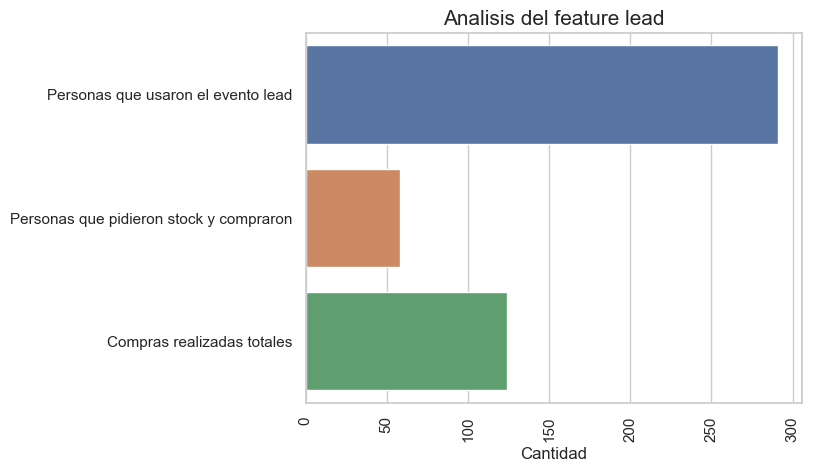

In [121]:
g = sns.barplot(x=data_from_lead.iloc[0], y=data_from_lead.columns, orient='h')
plt.xticks(rotation=90)
g.set_title("Analisis del feature lead", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)


Con los datos que fuimos juntando armamos este grafico que compara las cantidades entre los evento lead,los usuarios, y las compras realizadas por estos usuarios

In [117]:
df_lead_users_conversions = df_lead_users.loc[df_lead_users['event']== 'conversion']


df_lead_models = df_lead_users.loc[df_lead_users['person'].isin(df_lead_users_conversions['person'])]
df_lead_models = df_lead_models.loc[df_lead_models['event'] == 'lead']


values1 = df_lead_models['model'].value_counts().head(15)
values2 =df_lead_users_conversions['model'].value_counts().head(15)
ind = values1.index
ind2 = values2.index

Text(0,0.5,'Cantidad')

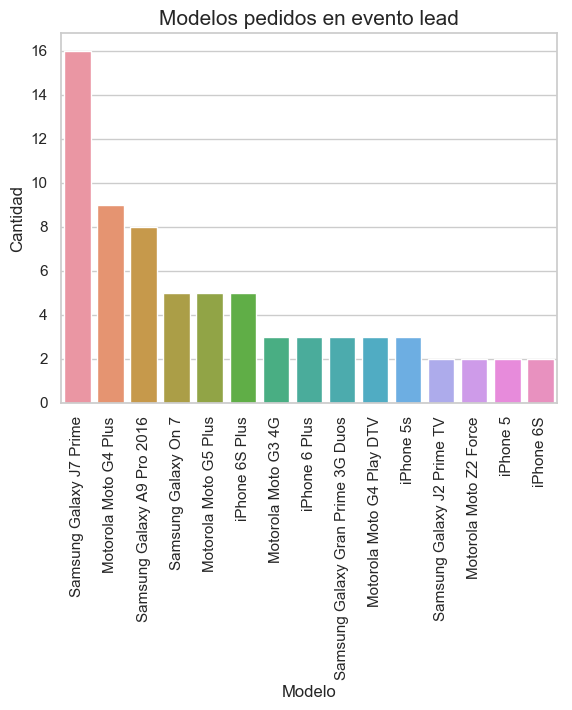

In [118]:
g = sns.barplot(x=ind, y=values1, orient='v')
plt.xticks(rotation=90)
g.set_title("Modelos pedidos en evento lead", fontsize=15)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad", fontsize=12)


Modelos en los que fue mas comun un evento de lead

Text(0,0.5,'Cantidad')

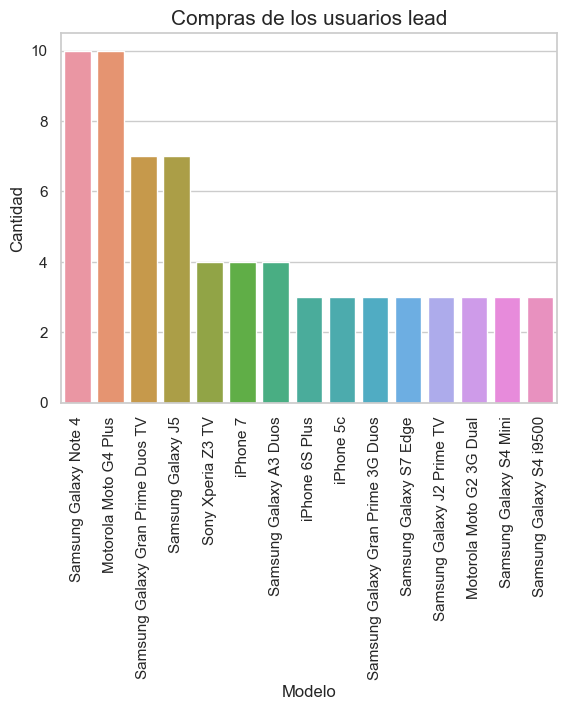

In [119]:
g = sns.barplot(x=ind2, y=values2, orient='v')
plt.xticks(rotation=90)
g.set_title("Compras de los usuarios lead", fontsize=15)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad", fontsize=12)

Los modelos que fueron mas comprados por los usuarios que hicieron lead